***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

***Reading and processing data***

In [2]:
raw_data = yf.download(tickers='AAPL', period='5y')
df = raw_data.copy()

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.746635,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.000780,134247600
2017-01-10,29.692499,29.844999,29.575001,29.777500,28.029016,97848400
2017-01-11,29.684999,29.982500,29.650000,29.937500,28.179625,110354400
2017-01-12,29.725000,29.825001,29.552500,29.812500,28.061964,108344800


In [4]:
size = int(len(df) * 0.8)
train, test = df[0:size], df[size:len(df)]

In [5]:
X_train = train.drop(['Close'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close'], axis=1)
y_test = test['Close']

***Prediction with default hyperparameters***

In [6]:
rfr_default = RandomForestRegressor()
rfr_default.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
predict_default = rfr_default.predict(X_test)

In [8]:
rmse_default = np.sqrt(mean_squared_error(y_test, predict_default))
rmse_default

15.120884696240163

***Hyperparameter tuning with GridSearchCV***

In [9]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),
        param_grid = { 
            "n_estimators": [10, 100, 200, 500],
            "max_features": ["auto", "sqrt", "log2"],
            "min_samples_split": [2,4,8],
            "bootstrap": [True, False],
            "max_depth": [10, 20, 50, 100]
})

In [10]:
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

In [11]:
best_params

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 10}

In [12]:
rfr_tuned = RandomForestRegressor(n_estimators=best_params["n_estimators"],
                                  bootstrap=best_params["bootstrap"],
                                  max_features=best_params["max_features"],
                                  min_samples_split=best_params["min_samples_split"],
                                  max_depth=best_params["max_depth"])

***Prediction with best hyperparameters***

In [13]:
rfr_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='log2',
                      min_samples_split=4, n_estimators=10)

In [14]:
predict_tuned = rfr_tuned.predict(X_test)

In [15]:
rmse_tuned = np.sqrt(mean_squared_error(y_test, predict_tuned))
rmse_tuned

14.920160511196105

In [18]:
test_copy = test.copy()

In [19]:
test_copy['Predicted'] = predict_tuned

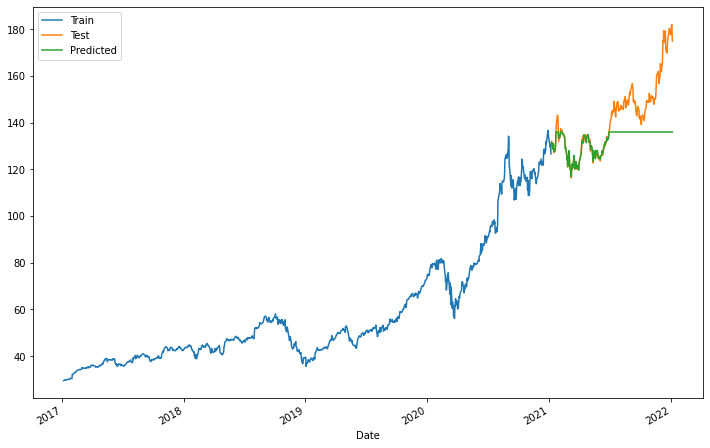

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
train.Close.plot()
test.Close.plot()
test_copy.Predicted.plot()
plt.legend(['Train', 'Test', 'Predicted'])
plt.show()

After Hyperparameter tuning, we can see that the rmse value is reduced to 14.920160511196105. Random forest is one of the best emsemble models that can be explored along with other models for best predictions.